In [78]:
from importlib import reload
import src.SolverAndEvents
reload(src.SolverAndEvents)
from src.SolverAndEvents import Event, Solver, EventError
import matplotlib.pyplot as plt
import numpy as np

In [79]:
ode1 = lambda t, y: t
ode2 = lambda t, y: t**2

SolverName = "sol1"
t0 = 0
tend = 2
yini = np.array([1])
atol = 1e-2
rtol = 1e-4

In [80]:
EventName1="f(t) is 1."
EventFunc1 = lambda t, y: y - 10
terminal1 = True
direction1 = 1

def EnsureYis10(sol, occurance):
    if occurance and sol.status==1:
        message = f"Solver "
        return {"primary":"finish"}
    elif not(occurance) and sol.status==1:
        return {"primary":"proceed"}
    if sol.status==0:
        tendnew = sol.t[-1]+1
        print(rf"Solver did not reach the target, increasing tend by 1 to {np.round(tendnew)}")
        return {"primary":"proceed", "secondary":{"tend":tendnew}}
    else: raise EventError
    

Yis10 = Event(EventName1, EventFunc1, terminal1, direction1, EnsureYis10)

In [81]:
EventName2="Switch at 1"
EventFunc2 = lambda t, y: y - 2
terminal2 = True
direction2 = 1

def SwitchODE(sol, occurance):
    if occurance and sol.status==1:
        return {"primary":"proceed","secondary":{"ODE":ode2}}
    elif not(occurance): return {}
    else: raise EventError
    return False

SwitchAt2 = Event(EventName2, EventFunc2, terminal2, direction2, SwitchODE)

In [82]:
Solver1 = Solver(SolverName, ode1, t0, yini, tend, atol, rtol, [Yis10, SwitchAt2])
Solver1.Solve()

2
Proceeding
[{'ODE': <function <lambda> at 0x7ff10b385360>}]
Updating ODE to <function <lambda> at 0x7ff10b385360>
2
Solver did not reach the target, increasing tend by 1 to 3.0
Proceeding
[{'tend': 2.999999999999935}]
Updating tend to 2.999999999999935
2.999999999999935
Finishing
[]


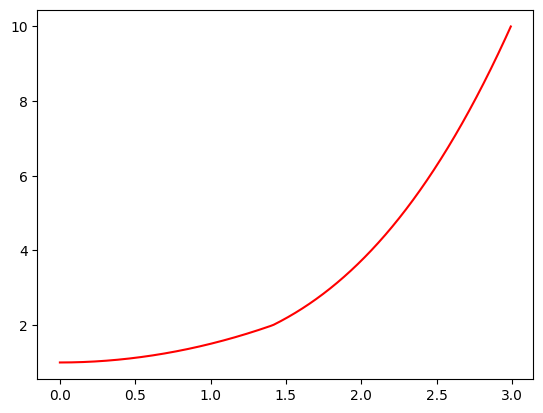

In [83]:
plt.plot(Solver1.solution.t, Solver1.solution.y[0], "r")